In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal, fft
import math as math

# import data

In [51]:
# import data
dataraw = pd.read_csv('/content/drive/My Drive/UW Projects/Sensor Fusion/Data/0810EMGraw/20210810-141934_su19so_trying0810raw_so_r-sos-O_d-sos+E_s49_p0a4_EMG.csv',
                   names=["Time", "Biceps (V)", "Triceps (V)","slider"])
# data = pd.read_csv('/content/drive/My Drive/UW Projects/Sensor Fusion/Data/EMG_controlled/20210805-154609_su19so_trying_so_r-sos-E_d-sos+O_s49_p0a1_EMG.csv',
                  #  names=["Time", "Biceps (V)", "Triceps (V)","slider"])
# data = pd.read_csv('/content/drive/My Drive/NEW Yamagami Lab/Projects/hcps/UG/Alexis/20190630-151540_su19so_HCPS_024_Manualso_so_r-sos-O_d-sos+E_s49_p0a4_EMG.csv',
#                    names=["Time", "Biceps (V)", "Triceps (V)"])

In [15]:
dataraw.head()

,Time,Biceps (V),Triceps (V),slider
0,2021-08-10-14:18:41.812196,0.0,0.0,0.0
1,2021-08-10-14:18:41.812196,0.0,0.0,0.0
2,2021-08-10-14:18:41.812196,0.0,0.0,0.0
3,2021-08-10-14:18:41.812196,0.0,0.0,0.0
4,2021-08-10-14:18:41.812196,0.0,0.0,0.0


In [75]:
#remove the zeros
data = dataraw[dataraw["Biceps (V)"].values != 0]
data.head()

,Time,Biceps (V),Triceps (V),slider
8024,2021-08-10-14:18:42.396673,523.0,488.0,584.0
8025,2021-08-10-14:18:42.396673,523.0,488.0,584.0
8026,2021-08-10-14:18:42.396673,523.0,488.0,584.0
8027,2021-08-10-14:18:42.396673,523.0,488.0,584.0
8028,2021-08-10-14:18:42.396673,523.0,488.0,584.0


In [76]:
# determine sampling frequency
len(data)
fs = 9600
len(data)/fs

57.1803125

## first plot time-domain signal for biceps and triceps

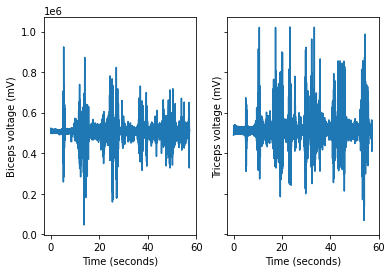

In [58]:
# plot time domain signals
fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(np.linspace(0,len(data)/fs,len(data)),data["Biceps (V)"].values*1000)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Biceps voltage (mV)")
ax2.plot(np.linspace(0,len(data)/fs,len(data)),data["Triceps (V)"].values*1000)
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Triceps voltage (mV)")
plt.show()

## plot after demeaning the EMG signal

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


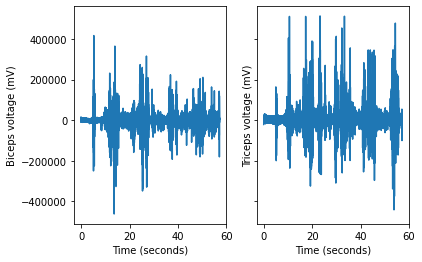

In [60]:
# plot time domain signals
data["bic_demean"]= data["Biceps (V)"].values-np.nanmean(data["Biceps (V)"].values)
data["tri_demean"]= data["Triceps (V)"].values-np.nanmean(data["Triceps (V)"].values)                                                    
                                                      
fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(np.linspace(0,len(data)/fs,len(data)),data["bic_demean"]*1000)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Biceps voltage (mV)")
ax2.plot(np.linspace(0,len(data)/fs,len(data)),data["tri_demean"]*1000)
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Triceps voltage (mV)")
plt.show()

#dc noise

## plot FFT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


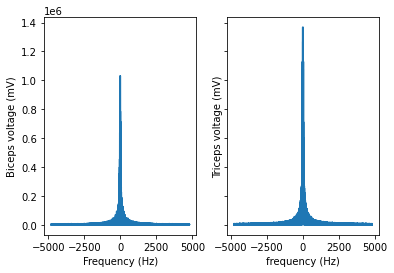

In [61]:
N = len(data)
T = 1./fs
xf = fft.fftfreq(N, 1 / fs)
# x = np.linspace(0.0, T*N, N)
# plot frequency domain signal for triceps
data["tri_fft"] = fft.fft(data["tri_demean"].values)
data["bic_fft"] = fft.fft(data["bic_demean"].values)

fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(xf,abs(data["bic_fft"]))
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Biceps voltage (mV)")
ax2.plot(xf,np.abs(data["tri_fft"].values))
ax2.set_xlabel("frequency (Hz)")
ax2.set_ylabel("Triceps voltage (mV)")
plt.show()

## Step 1. high pass filter 

4th order butterworth at 40Hz

Use second order format when filtering to avoid numerical error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


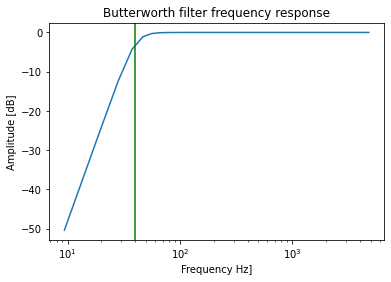

In [62]:
# CREATE AND PLOT BUTTERWORTH FILTER
sos = signal.butter(N=4,Wn=40,btype='hp',fs=fs, output='sos')
# plot butterworth filter
w, h = signal.sosfreqz(sos=sos,fs=fs)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency Hz]')
plt.ylabel('Amplitude [dB]')
# plt.margins(0, 0.1)
# plt.grid(which='both', axis='both')
plt.axvline(40, color='green') # cutoff frequency
plt.show()

In [63]:
# FILTER THE DATA 
data["bic_hp"] = signal.sosfiltfilt(sos=sos,x=data["bic_demean"].values)
data["tri_hp"] = signal.sosfiltfilt(sos=sos,x=data["tri_demean"].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


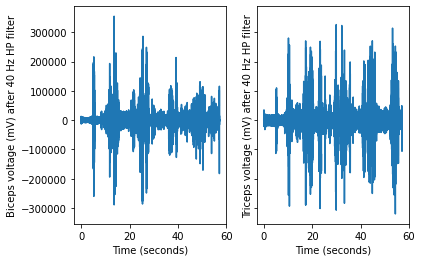

In [64]:
# PLOT THE FILTERED DATA
fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(np.linspace(0,len(data)/fs,len(data)),data["bic_hp"]*1000)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Biceps voltage (mV) after 40 Hz HP filter")
ax2.plot(np.linspace(0,len(data)/fs,len(data)),data["tri_hp"]*1000)
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Triceps voltage (mV) after 40 Hz HP filter")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


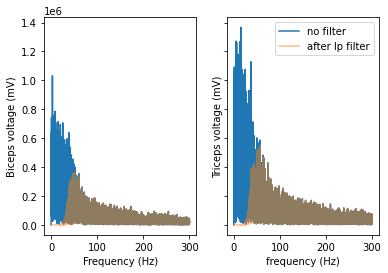

In [65]:
# PLOT IN FREQ DOMAIN AND COMPARE AGAINST UNFILTERED
data["tri_hp_fft"] = fft.fft(data["tri_hp"].values)
data["bic_hp_fft"] = fft.fft(data["bic_hp"].values)
divby = 32

fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(xf[:int(N/divby)],abs(data["bic_fft"])[:int(N/divby)],label='no filter')
ax1.plot(xf[:int(N/divby)],abs(data["bic_hp_fft"])[:int(N/divby)],label='after lp filter',alpha=0.5)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Biceps voltage (mV)")
ax2.plot(xf[:int(N/divby)],np.abs(data["tri_fft"].values[:int(N/divby)]),label='no filter')
ax2.plot(xf[:int(N/divby)],np.abs(data["tri_hp_fft"].values[:int(N/divby)]),label='after lp filter',alpha=0.5)
ax2.set_xlabel("frequency (Hz)")
ax2.set_ylabel("Triceps voltage (mV)")
plt.legend()
plt.show()

## Step 2: Rectification (abs everything)

In [66]:
data["bic_rect"] = abs(data["bic_hp"])
data["tri_rect"] = abs(data["tri_hp"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


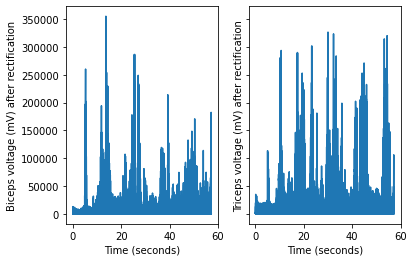

In [67]:
fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(np.linspace(0,len(data)/fs,len(data)),data["bic_rect"]*1000)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Biceps voltage (mV) after rectification")
ax2.plot(np.linspace(0,len(data)/fs,len(data)),data["tri_rect"]*1000)
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Triceps voltage (mV) after rectification")
plt.show()

## Step 3: low pass filter

40 Hz low pass filter 4th order butterworth

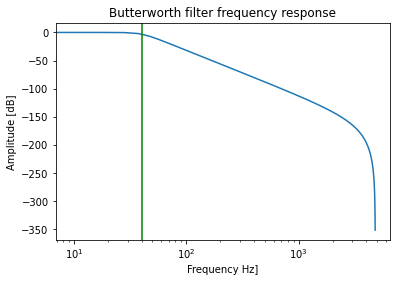

In [68]:
sos = signal.butter(N=4,Wn=40,btype='lowpass',fs=fs, output='sos')
# plot butterworth filter
w, h = signal.sosfreqz(sos=sos,fs=fs)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency Hz]')
plt.ylabel('Amplitude [dB]')
# plt.margins(0, 0.1)
# plt.grid(which='both', axis='both')
plt.axvline(40, color='green') # cutoff frequency
plt.show()

In [69]:
# FILTER THE DATA 
data["bic_lp"] = signal.sosfiltfilt(sos=sos,x=data["bic_rect"].values)
data["tri_lp"] = signal.sosfiltfilt(sos=sos,x=data["tri_rect"].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


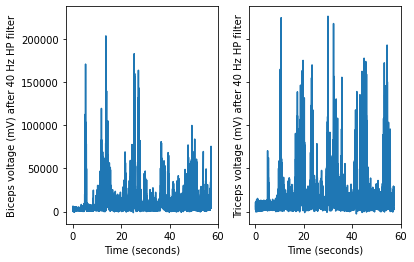

In [70]:
# PLOT THE FILTERED DATA
fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(np.linspace(0,len(data)/fs,len(data)),data["bic_lp"]*1000)
ax1.set_xlabel("Time (seconds)")
ax1.set_ylabel("Biceps voltage (mV) after 40 Hz HP filter")
ax2.plot(np.linspace(0,len(data)/fs,len(data)),data["tri_lp"]*1000)
ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Triceps voltage (mV) after 40 Hz HP filter")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


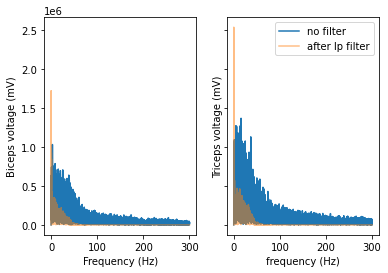

In [71]:
divby = 32
# PLOT IN FREQ DOMAIN AND COMPARE AGAINST UNFILTERED
data["tri_lp_fft"] = fft.fft(data["tri_lp"].values-np.mean(data["tri_lp"].values))
data["bic_lp_fft"] = fft.fft(data["bic_lp"].values-np.mean(data["bic_lp"].values))

fig,[ax1,ax2] = plt.subplots(1,2,sharex=True,sharey=True)
ax1.plot(xf[:int(N/divby)],abs(data["bic_fft"])[:int(N/divby)],label='no filter')
ax1.plot(xf[:int(N/divby)],abs(data["bic_lp_fft"])[:int(N/divby)],label='after lp filter',alpha=0.5)
ax1.set_xlabel("Frequency (Hz)")
ax1.set_ylabel("Biceps voltage (mV)")
ax2.plot(xf[:int(N/divby)],np.abs(data["tri_fft"].values[:int(N/divby)]),label='no filter')
ax2.plot(xf[:int(N/divby)],np.abs(data["tri_lp_fft"].values[:int(N/divby)]),label='after lp filter',alpha=0.5)
ax2.set_xlabel("frequency (Hz)")
ax2.set_ylabel("Triceps voltage (mV)")
plt.legend()
plt.show()

# Compute Power spectral density

Welch's PSD estimate with 50% overlap 

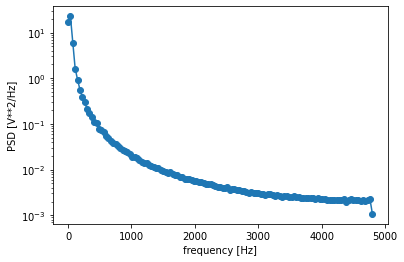

In [72]:
f, Pxx_den = signal.welch(data["bic_demean"], fs=fs,detrend=False)
plt.semilogy(f, Pxx_den,"-o")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

# Compute SNR

baseline noise

noise power is the sum of the PSD above 1600 Hz (top 20% of 2000Hz)

total power is the sum of the PSD across all frequencies

depended on how big your movement is. (ex: small move vs. MVIC)

In [73]:
#spikershields EMG SNR
# 20% of frequencies (400 Hz)
# find indices greater than 400 Hz 
f_ind_upper = [ n for n,i in enumerate(f) if i>0.2*fs ]
noise_power = np.sum(Pxx_den[f_ind_upper])
print(noise_power)
total_power = np.sum(Pxx_den)
print(total_power)
SN = total_power/noise_power
print(10*np.log(SN)) # 10 times the decimal

0.23463889911097888
51.61649974820356
53.93548930082001


In [ ]:
# Delsys SNR (for comparison)
# 20% of frequencies (400 Hz)
# find indices greater than 400 Hz 
f_ind_upper = [ n for n,i in enumerate(f) if i>400 ]
noise_power = np.sum(Pxx_den[f_ind_upper])
print(noise_power)
total_power = np.sum(Pxx_den)
print(total_power)
SN = total_power/noise_power
print(10*np.log(SN)) # 10 times the decimal

2.1560023567073306e-13
8.059828237434072e-11
59.238066856488985


In [ ]:
# guess for spikerShields EMG, about 30
# above 30 is good
# 15 is the absolute minimum 

# SMR

When moving, cables can cause motion artifects. --> low freq noise

# EMG signal processing

1. analog signal processing
2. digital signal processing (this colab), convert analog to digital